linear models can be quite limiting to lowdimensional spaces, as lines or hyperplanes have limited flexibility. One way to make a linear model more flexible is by adding more features, for example by adding interactions or polynomials of the input features 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [26]:
# preparing a synthetic data set
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

Text(0,0.5,'feature2')

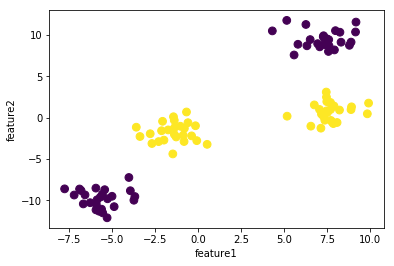

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
plt.xlabel("feature1")
plt.ylabel("feature2")

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset

Text(0,0.5,'feature2')

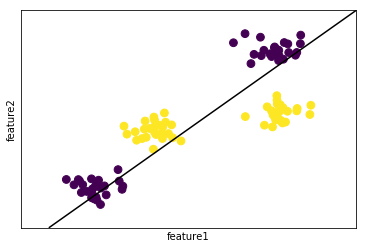

In [28]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
plt.xlabel("feature1")
plt.ylabel("feature2")

We can clearly see that the Linear Cassifier has performed very poorly for this dataset. Now, if we expand the set of input features by adding new feature.

In [29]:
X_new = np.hstack([X, X[:, 1:] ** 2])

Instead of representing each data point as a two-dimensional point (feature1, feature2), we now represent it as a threedimensional point (feature1, feature2, feature2 ** 2)

Text(0.5,0,'feature1 ** 2')

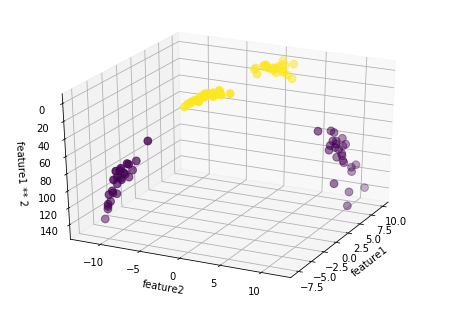

In [30]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

In the new, three-dimensional representation of the data, it is now indeed possible to separate the yellow and the purple points using a linear model, a plane in three dimensions.

Text(0.5,0,'feature1 ** 2')

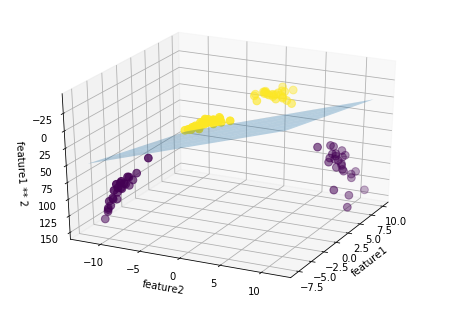

In [31]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse

Text(0,0.5,'feature2')

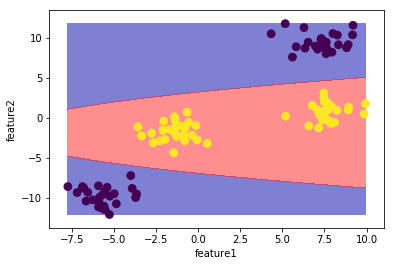

In [32]:
# considering the top view for the above visual we can confirm that that sides of tha planes we had fit are not parallel
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
plt.xlabel("feature1")
plt.ylabel("feature2")

Here we have added non-linear feature to the representation of our data which in turn made linear models much more powerful. However, often we don’t know which features to add, and adding many features will make computation very expensive.

Luckily, there is a clever mathematical trick called **kernel trick** that allows us to learn a classifier in a higher dimensional space without actually making it computationally expensive.

The kernel trick works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without actually computing the expansion.

A **kernel** is usually used to refer to the kernel trick, a method of using a linear classifier to solve a non-linear problem. It entails transforming linearly inseparable data to linearly separable ones . The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable

There are two ways to map your data into a higher dimensional space, that are commonly used with support vector machines: 
- **polynomial kernel** 
- **Radial basis function (rbf) kernel** also known as Gaussian kernel.

** Polynomial Kernel ** computes all possible polynomials up to a certain degree of the original features $$ \space like \space (feature1^2 * feature2^5) $$

** The Gaussian kernel ** is a bit harder to explain, as it corresponds to an infinite dimensional feature space. One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees of polynomials.

the SVM learns how important each of the training data points is to represent the decision boundary between the two classes as typically only a subset of the training points matter for defining the decision boundary, the ones that lie on the border between the classes and those points are called as support vectors which brings th name SVMs.

To make a prediction for a new point, the distance to these support vectors is measured. For classification, decision is made based on the distance to the support vectors, and the importance of the support vectors that is learned during training.

Below is the result of training an support vector machine on a two-dimensional twoclass dataset.

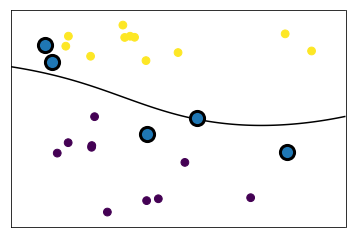

In [55]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# plot data
plt.scatter(X[:, 0], X[:, 1], s=60, c=y)
# plot support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=200, zorder=10, linewidth=3, edgecolors='black')

The classifier yields a smooth and non-linear decision boundary. But we can play with the parameters and tune the model.

- width of the decision boundary (gamma) which actually controls the Gaussian kernel. It determines the scale of what it means for points to be close together.
- Regularization parameter (C) that limits the importance of each point.


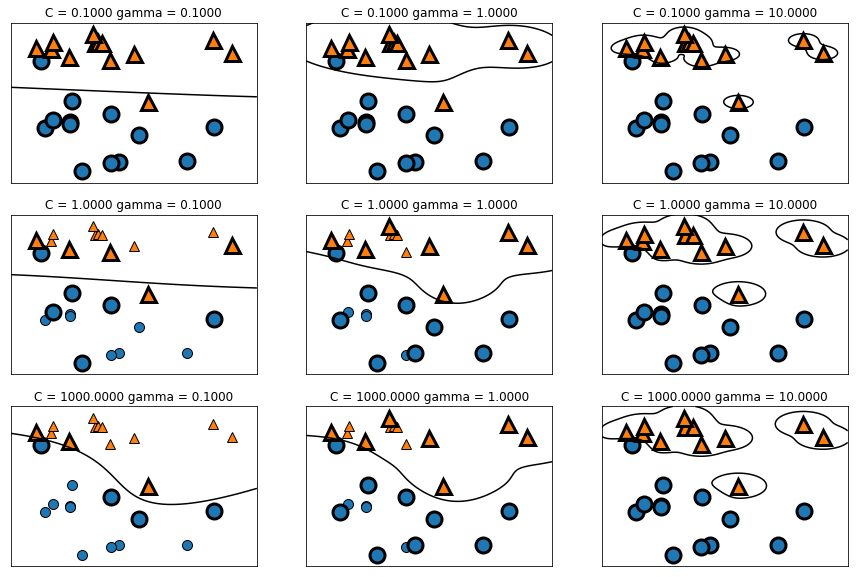

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

Moving from left to right, we increase the gamma parameter from 0.1 to 10, small gamma values mean larger radius for the kernel and which in turn means that more points are considered as support vectors.

Due to this the decision boundaries tend to be much smoother of left while the boundaries on right are more focused on individual points.

Also for lower values of gamma the decision boundary varies slowly and results in a model with very low complexity, while high values of gamma bring up more complex models.


Going from top to bottom, we increase the C parameter from 0.1 to 1000. For smaller values of regularization parameter represent a very restricted model, where an individual data point will have very limited influence. Also in the top left plot, the decision boundary is nearly linear, with the blue and orange points that are misclassified barely changing the line.

And with raising C values, all the points in the data tend to have a stronger influence on the model. This makes the decision boundary bend more and classify the data more effeciently.

In [71]:
# cancer data set.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
svc = SVC()
svc.fit(X_train, y_train)
print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.615385


Model has overfit quite substantially,

Even though SVMs are known to perform well on a non-linear data, they are very sensitive to the values of the parameters since these parameters play a vital role in determining the decision boundary. Also SVMs are known to be very responsive to the feature space. They require the features to be on a similar scale. 

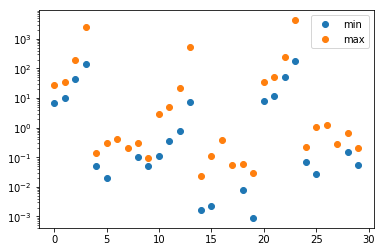

In [63]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")

From this plot we can determine that features in the dataset are of completely different orders of magnitude. And this could be a problem for kernel SVMs. Only way to resolve this is to rescale the features and apply SVC again.

- SVMs are known to identify the complex non-linear boundaries in the data.
- They perform pretty well even on a high dimensional data but cannot scale for bigger datasets.
- Also SVMs require a lot more supervision for hyperparameter tuning.